Importing Libraries

  - `pandas` as `pd` for data manipulation and analysis.
  - `numpy` as `np` for numerical operations.
  - `matplotlib.pyplot` as `plt` for creating visualizations.
  - `ast` for safely evaluating strings into python objects.
  - `seaborn` as `sns` for statistical data visualization and enhanced plotting.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

##### Loading Data

- **Reading CSV File:** reading a csv file into a dataframe named `df`, which is used for data analysis and manipulation.


In [18]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
353199,Data Analyst,Master Data Finance Analyst,"Sligo, Ireland",via BeBee Ireland,Full-time,False,Ireland,2023-10-15 23:17:27,False,False,Ireland,NaN,NaN,NaN,Amcor,"['sap', 'excel']","{'analyst_tools': ['sap', 'excel']}"
371135,Machine Learning Engineer,Senior Machine Learning Engineer,"Cairo, Egypt",via Bayt.com,Full-time,False,Egypt,2023-03-30 00:01:15,False,False,Egypt,NaN,NaN,NaN,EgyGamer LLC.,"['python', 'mysql', 'elasticsearch', 'pytorch'...","{'databases': ['mysql', 'elasticsearch'], 'lib..."


##### Data Cleanup

- **Renaming Columns:** assigning new column names to the dataframe.

- **Converting Dates:** using `pd.to_datetime()` to change the 'posted_dt' column from string to datetime format.

- **Converting Skills:**
  - using `.apply() `function to convert 'skills' from string to list format by applying a custom function to  every row of a dataFrame.
  - using `ast.literal_eval()` to evaluate and convert strings to python objects.
  - ensuring conversion only happens if the value is not missing using `pd.notna(gg)`.

- **Handling Missing Values:** optionally dropping rows with missing values in the 'salyr' column using `df.dropna()` (commented out).

In [19]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg) 
#df.dropna(subset=['salyr'],inplace=True)

Sample

- Random sample of 2 rows from the modified dataFrame `df`

In [20]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
168992,Machine Learning Engineer,Senior Machine Learning Engineer,"Dublin, Ireland",via LinkedIn,Full-time,False,Ireland,2023-10-04 15:35:30,False,False,Ireland,NaN,NaN,NaN,Harvey Nash,[python],{'programming': ['python']}
452987,Data Analyst,Data Analyst,"Lucca, Province of Lucca, Italy",via Indeed,Full-time,False,Italy,2023-04-24 14:19:32,False,False,Italy,NaN,NaN,NaN,ITALIA GAS E LUCE,"[sql, vba, power bi, excel, ssrs]","{'analyst_tools': ['power bi', 'excel', 'ssrs'..."


# For Data Analysts in India

Filtering and Exploding  

- **Filtering DataFrame:** filtering the original dataframe to include only rows where the `job` column is `'data analyst'` and the `country` column is `'india'`, creating a new dataframe `df_da_ind`. making a copy of the filtered dataframe.

- **Adding Column:** adding a new column `posted_month_no` to `df_da_ind` by extracting the month from the `posted_dt` column.

- **Exploding Skills:** exploding the `skills` column in `df_da_ind` to create a new dataframe `df_da_ind_exp`, where each skill in the list is transformed into its own row. this allows for easier analysis of individual skills.


In [21]:
df_da_ind = df[(df['job']== 'Data Analyst') & (df['country']== 'India')].copy()
df_da_ind['posted_month_no'] = df_da_ind['posted_dt'].dt.month

df_da_ind_exp = df_da_ind.explode('skills')
df_da_ind_exp.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype,posted_month_no
394982,Data Analyst,Data Analytics,India,via BeBee India,Full-time,False,India,2023-05-30 18:10:39,False,False,India,NaN,NaN,NaN,JP Morgan Chase,sql,"{'analyst_tools': ['qlik', 'tableau', 'alteryx...",5
672979,Data Analyst,Data Analyst Level 3,"Secunderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-09-14 10:10:47,False,False,India,NaN,NaN,NaN,Certara,r,"{'analyst_tools': ['excel'], 'programming': ['...",9


Creating and Sorting a Pivot Table

- **Creating a Pivot Table:** creating a pivot table from the `df_da_ind_exp` dataframe, using `posted_month_no` as the index and `skills` as the columns. the table is aggregating the count of each skill per month using the 'size' function and filling missing values with 0.

- **Adding Total Row:** adding a new row labeled 'total' to the pivot table, which contains the sum of each skill across all months.

- **Reordering Columns:** reordering the columns in the pivot table based on the total counts of each skill, sorting them in descending order.

- **Dropping Total Row:** dropping the 'total' row from the pivot table, leaving only the monthly counts for each skill.


In [22]:
df_da_ind_table = df_da_ind_exp.pivot_table(index='posted_month_no', columns='skills',aggfunc= 'size', fill_value= 0)
df_da_ind_table.loc['total'] = df_da_ind_table.sum()
df_da_ind_table = df_da_ind_table[df_da_ind_table.loc['total'].sort_values(ascending=False).index]
df_da_ind_table = df_da_ind_table.drop('total')
df_da_ind_table

skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


Counting Monthly Job Postings

- **Grouping Data:** grouping the `df_da_ind` dataframe by the `posted_month_no` column and calculating the size of each group.

- **Calculating Counts:** the result is a series named `df_da_ind_monthly_jobs` where the index is `posted_month_no` and the values are representing the count of data analyst jobs posted each month.

In [23]:
df_da_ind_monthly_jobs = df_da_ind.groupby('posted_month_no').size()
df_da_ind_monthly_jobs

posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

Calculating Skill Percentages 

- **Converting to Percentages:** dividing each value in the `df_da_ind_table` dataframe by the corresponding monthly job count from `df_da_ind_monthly_jobs`, then multiplying by 100. the result is a dataframe named `df_da_ind_table_percent` where each value represents the percentage of job postings for each skill in relation to the total number of data analyst jobs posted each month.

In [24]:
df_da_ind_table_percent = df_da_ind_table.div(df_da_ind_monthly_jobs/100,axis=0)
df_da_ind_table_percent

skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
2,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
4,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
6,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Formatting and Indexing

- **Resetting the Index:** resetting the index of the `df_da_ind_table_percent` dataframe, converting the existing index into a column.

- **Adding a New Column:** adding a new column `posted_month` by converting `posted_month_no` to a month name using `pd.to_datetime` and `strftime`.

- **Setting the New Index:** setting the new `posted_month` column as the index of the dataframe.

- **Dropping a Column:** dropping the `posted_month_no` column from the dataframe, keeping only the `posted_month` index and the percentage data.


In [25]:
df_da_ind_table_percent.reset_index(inplace=True)
df_da_ind_table_percent['posted_month'] = df_da_ind_table_percent['posted_month_no'].apply(lambda g: pd.to_datetime(g,format= '%m').strftime('%b'))
df_da_ind_table_percent.set_index('posted_month',inplace=True)
df_da_ind_table_percent.drop(columns='posted_month_no',inplace=True)
df_da_ind_table_percent

skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


Selecting Top 5 Skills for Plotting

- **Selecting Columns:** selecting the first five columns of the `df_da_ind_table_percent` dataframe to create a new dataframe named `df_da_ind_plot`, which includes only these selected columns for further plotting or analysis.

In [26]:
df_da_ind_plot = df_da_ind_table_percent.iloc[:,:5]
df_da_ind_plot

skills,sql,python,excel,tableau,power bi
posted_month,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096
Feb,48.267898,34.180139,36.027714,26.789838,17.321016
Mar,54.265403,35.781991,32.701422,29.620853,18.009479
Apr,48.803828,34.210526,33.014354,23.444976,19.856459
May,55.755396,36.330935,38.129496,25.539568,21.942446
Jun,52.588556,40.871935,31.335150,31.062670,20.980926
Jul,53.610503,35.229759,38.074398,27.133479,20.350109
Aug,51.294498,34.951456,31.067961,24.595469,20.550162
Sep,54.126984,36.349206,36.190476,30.952381,26.666667


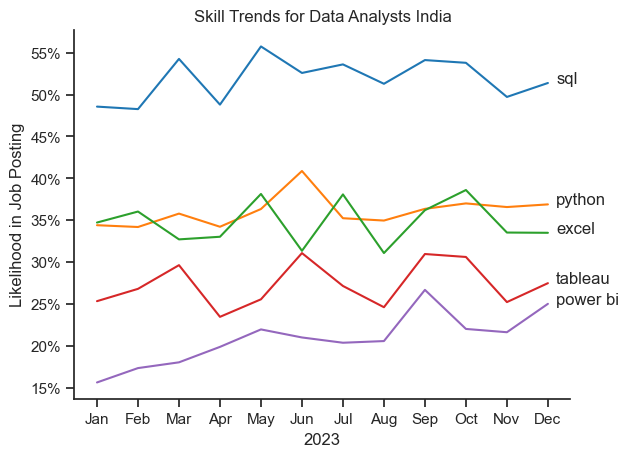

In [27]:
# Setting Up for Plot
sns.set_theme(style='ticks')

# Creating Plot
sns.lineplot(data=df_da_ind_plot, dashes= False, palette= 'tab10')

# Modifying Axes and Lables
from matplotlib.ticker import PercentFormatter
ax = plt.gca() # to get the current axes of the current figure
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for column in df_da_ind_plot.columns:
    plt.text(11.2, df_da_ind_plot[column].iloc[-1], column) # to add lables at the end of lines

plt.title('Skill Trends for Data Analysts India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

# Display the plot
sns.despine() # to remove borders
plt.show()


# For Top 3 Data Jobs in India

Identifying Top 3 Job Titles

- **Finding Top Job Titles:** finding the top three most common job titles in the `job` column of the dataframe by counting occurrences and selecting the most frequent ones.

- **Converting to List:** converting these job titles to a list and assigning it to `job_list`.

In [28]:
job_list = df['job'].value_counts().head(3).index.to_list()
job_list

['Data Analyst', 'Data Engineer', 'Data Scientist']

Processing and Analyzing Top 3 Job Titles

- **Initializing Dictionary:** initializing an empty dictionary named `top3_jobs`.

- **Looping Through Job Titles:** looping through each job title in `job_list`:

  - filtering the dataframe to include only rows where the job title matches the current job and the country is `'India'`, creating a new dataframe `df_ind`. adding a new column `posted_month_no` by extracting the month from `posted_dt`.
  
  - exploding the `skills` column to create a new dataframe `df_ind_exp`, where each skill in the list becomes its own row.
  
  - creating a pivot table from `df_ind_exp` with `posted_month_no` as the index and `skills` as the columns, aggregating by count. adding a 'total' row to the pivot table with the sum of each skill across all months and reordering the columns based on these totals. dropping the 'total' row.
  
  - calculating the monthly job counts and creating a percentage table `df_ind_table_percent` by dividing each value in the pivot table by the corresponding monthly job count, then resetting the index.
  
  - converting `posted_month_no` to month names and setting this as the new index. dropping the `posted_month_no` column.
  
  - selecting the first five columns of `df_ind_table_percent` to create `df_ind_plot`.

- **Storing Results:** storing `df_ind_plot` in the `top3_jobs` dictionary with the job title as the key.


In [29]:

top3_jobs = {}

for i in job_list:

    df_ind = df[(df['job']== i) & (df['country']== 'India')].copy()
    df_ind['posted_month_no'] = df_ind['posted_dt'].dt.month
    df_ind_exp = df_ind.explode('skills')
    df_ind_table = df_ind_exp.pivot_table(index='posted_month_no', columns='skills',aggfunc= 'size', fill_value= 0)
    df_ind_table.loc['total'] = df_ind_table.sum()
    df_ind_table = df_ind_table[df_ind_table.loc['total'].sort_values(ascending=False).index]
    df_ind_table = df_ind_table.drop('total')
    df_ind_monthly_jobs = df_ind.groupby('posted_month_no').size()
    df_ind_table_percent = df_ind_table.div(df_ind_monthly_jobs/100,axis=0)
    df_ind_table_percent.reset_index(inplace=True)
    df_ind_table_percent['posted_month'] = df_ind_table_percent['posted_month_no'].apply(lambda g: pd.to_datetime(g,format= '%m').strftime('%b'))
    df_ind_table_percent.set_index('posted_month',inplace=True)
    df_ind_table_percent.drop(columns='posted_month_no',inplace=True)
    df_ind_plot = df_ind_table_percent.iloc[:,:5]

    top3_jobs[i] = df_ind_plot
                         

Accessing Skill Percentage Data for Data Engineer Jobs in India

In [30]:
top3_jobs['Data Engineer']

skills,sql,python,spark,aws,azure
posted_month,,,,,
Jan,68.433396,61.913696,39.118199,35.600375,35.881801
Feb,69.466585,60.944206,40.159411,35.683630,33.905579
Mar,67.441860,61.596480,38.654934,37.209302,33.123821
Apr,68.454662,59.131545,39.208174,36.206897,33.333333
May,66.112717,59.898844,39.595376,37.138728,33.815029
Jun,68.382353,59.681373,39.460784,36.887255,36.519608
Jul,68.848168,58.965969,34.489529,37.238220,38.808901
Aug,66.453447,56.716418,36.247335,37.953092,34.470505
Sep,66.047745,58.753316,33.753316,35.079576,35.344828


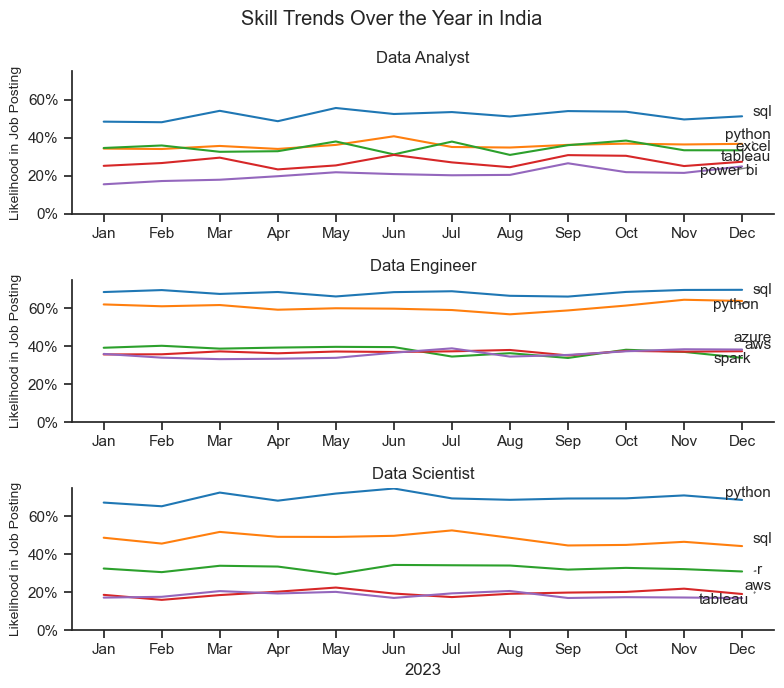

In [35]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Setting Up for Plot
sns.set_theme(style='ticks')
fig, ax = plt.subplots(len(top3_jobs),1,figsize = (8,7))

# Creating Plot
for i,(key,value) in enumerate(top3_jobs.items()):
    sns.lineplot(data=value, dashes= False, palette= 'tab10', ax=ax[i], legend=False)

    # Modifying Axes and Labels
    ax[i].yaxis.set_major_formatter(PercentFormatter(decimals=0))

    # Preperaing texts for adjustText
    texts = []
    for column in value.columns:
        texts.append(ax[i].text(11.2, value[column].iloc[-1], column, fontsize=11)) 
    
    # Adjusting text to avoid overlap
    adjust_text(texts,ax=ax[i],arrowprops=dict(arrowstyle='->', color='gray'))

    ax[i].set_title(key)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Likelihood in Job Posting', fontsize = 10)
    ax[i].set_ylim(0,75)

ax[2].set_xlabel('2023')

# Modifying the entire figure
plt.suptitle('Skill Trends Over the Year in India')

# Displaying the plot
sns.despine() # to remove borders
plt.tight_layout()
plt.show()


`End`
---

---